In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
# from scipy import interpolate
# import scipy.integrate as integrate

In [2]:
# Given a wavefunction u, solve the Poisson equation
def solve_poisson(us, rs):
    # Constant set by boundary conditions
    k = - np.trapz(np.power(us,2)/rs, rs)

    Phis = np.zeros(len(rs))
    for i, r in enumerate(rs):
        # Calculate integrals for each value of r
        u2int = np.trapz(np.power(us[:i],2), rs[:i])
        u2orint = np.trapz(np.power(us[:i],2)/rs[:i], rs[:i])

        Phis[i] = - 1/r*u2int + u2orint + k

    return Phis

# def solve_poisson(us, rs):
#     us_refl, rs_refl = np.concatenate((-us, us)), np.concatenate((-rs, rs))
#     us2 = interpolate.interp1d(rs_refl, us_refl*us_refl)
#     us2or = lambda r: us2(r)/r

#     k = - integrate.quad(us2or, 0, rs[-1])[0]
#     Phis = np.zeros(len(rs))
#     for i, r in enumerate(rs):
#         u2int = integrate.quad(us2, 0, r)[0]
#         u2orint = integrate.quad(us2or, 0, r)[0]
#         Phis[i] = - 1/r*u2int + u2orint + k

#     return Phis

# Given potential Phi, solve Schrodinger equation
def solve_schr(Phis, rs):
    rmin, rmax, nr = rs[0], rs[-1], len(rs)
    dr = (rmax - rmin)/nr

    # Discretized derivatives
    A = np.zeros((nr, nr)) + np.diag([-2]*nr)
    for n in np.arange(1,nr):
        A[n][n - 1] = 1
        A[n - 1][n] = 1
    A = -A/(2*np.power(dr,2)) + np.diag(Phis)

    # Solve eigenvalue problem and find ground state
    eigval, eigvec = eigsh(A, k = 1, which = 'SA')
    # Normalize eigenvector
    eigvec = np.array([uelem[0] for uelem in eigvec])
    norm = np.sqrt(np.trapz(np.power(eigvec,2),rs))
    eigvec = np.abs(eigvec/norm)

    return eigval[0], eigvec

def find_ground(uguess, rs):
    eigval, eig_err = 1e5, 1e5
    while np.abs(eig_err) > 1e-9:
        Phis_sol = solve_poisson(uguess, rs)

        eigval_old = eigval
        eigval, uguess = solve_schr(Phis_sol, rs)

        eig_err = (eigval - eigval_old)/ eigval_old

    return uguess

(0.0, 0.08)

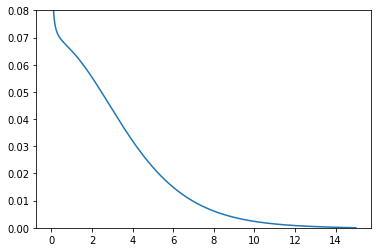

In [3]:
rmin, rmax, nr = 1e-2, 15, 500
rs = np.linspace(rmin, rmax, nr)
uguess = rs*np.exp(-np.power(rs, 2)/10)

us = find_ground(uguess, rs)
plt.plot(rs, us/(np.sqrt(4*np.pi)*rs))
plt.ylim(top = 0.08, bottom = 0)